In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from entsoe import EntsoePandasClient

In [3]:
my_api_key = os.environ.get('ENTSOE_API_KEY')
client = EntsoePandasClient(api_key=my_api_key)

# Parameters of the dataset

In [4]:
start_date = '2017-01-01'
end_date = '2017-12-31'
country_code = 'HU'

start_ts = pd.Timestamp(start_date, tz='Europe/Brussels')
end_ts = pd.Timestamp(end_date, tz='Europe/Brussels')

In [70]:
filename = f"{start_date}_{end_date}_{country_code}.csv"

if os.path.exists(f'./data/{filename}'):
    print("The file exists, reading data from file")
    df = pd.read_csv(f'./data/{filename}', index_col=0, parse_dates=True)
else:
    print("The file does not exist, download data from ENTSO-E")

    df = client.query_day_ahead_prices(country_code, start=start_ts, end=end_ts)        # Data from ENTSO-E
    df.to_csv(f'./data/{filename}')


The file exists, reading data from file


In [71]:
df

,0
2017-01-01 00:00:00+01:00,57.25
2017-01-01 01:00:00+01:00,50.21
2017-01-01 02:00:00+01:00,44.04
2017-01-01 03:00:00+01:00,32.81
2017-01-01 04:00:00+01:00,28.41
...,...
2017-12-30 20:00:00+01:00,29.89
2017-12-30 21:00:00+01:00,25.59
2017-12-30 22:00:00+01:00,20.05
2017-12-30 23:00:00+01:00,4.30


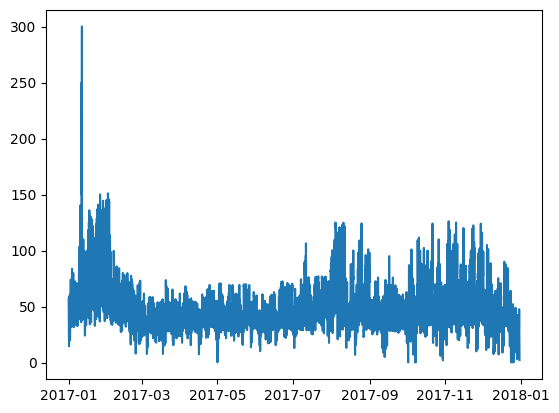

In [73]:
plt.plot(df)